# Lending Club Case Study

<p> The Objective of this project is to identify the variables which will help us to identidy the defaulters more accurately. </p>
<p> 'Lending Club' company is the largest online loan marketplace, facilitating personal loans, business loans, and financing of medical procedures. Borrowers can easily access lower interest rate loans through a fast online interface.</p>
<hr/>

#### Import Libraries

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

<br/> 

## Data Understanding
<hr/>

In [71]:
# Reading data from loan.csv file saved in the sub-folder 'Datasets'
loan_data = pd.read_csv('Datasets/loan.csv')

C:\Users\jchavan\AppData\Local\Temp\ipykernel_25920\3124801929.py:2: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  loan_data = pd.read_csv('Datasets/loan.csv')


In [72]:
# Let us check the type of the variable created
type(loan_data)

pandas.core.frame.DataFrame

In [73]:
# Check number of rows and columns in the dataframe using shape property
loan_data.shape

(39717, 111)

Data is imported into the DataFrame format with 39717 records and 111 columns, however, while loading data, pandas has given the message that Column #47 have mixed types.
<hr/>
Let us check out the data in column 47.

In [74]:
loan_data.iloc[:,[47]]

,next_pymnt_d
0,NaN
1,NaN
2,NaN
3,NaN
4,Jun-16
...,...
39712,NaN
39713,NaN
39714,NaN
39715,NaN


In [75]:
loan_data.iloc[:,[47]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 1 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   next_pymnt_d  1140 non-null   object
dtypes: object(1)
memory usage: 310.4+ KB


<p>This is a date column saved in the str format as well as it contains NaN values, hence, it is considered as Object type.
</p>


In [76]:
# Calculate the % of NaN records (39717-1140=38577)
38577/39717*100

97.12969257496789

**Since there are 97.13% records with Null values in this column, we'll drop this column from the Analysis.***

In [77]:
loan_data.drop('next_pymnt_d', axis=1, inplace=True)

In [78]:
# Check the shape now
loan_data.shape

(39717, 110)

This explains that now we have total 39,717 records with 110 features/columns in the dataset.
<hr/>
Let us view initial few records for better understanding.

In [79]:
loan_data.head(10)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
5,1075269,1311441,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
6,1069639,1304742,7000,7000,7000.0,60 months,15.96%,170.08,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
7,1072053,1288686,3000,3000,3000.0,36 months,18.64%,109.43,E,E1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
8,1071795,1306957,5600,5600,5600.0,60 months,21.28%,152.39,F,F2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
9,1071570,1306721,5375,5375,5350.0,60 months,12.69%,121.45,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [80]:
# View the data type of each of the column, add a parameter verbose.
loan_data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 110 columns):
 #    Column                          Dtype  
---   ------                          -----  
 0    id                              int64  
 1    member_id                       int64  
 2    loan_amnt                       int64  
 3    funded_amnt                     int64  
 4    funded_amnt_inv                 float64
 5    term                            object 
 6    int_rate                        object 
 7    installment                     float64
 8    grade                           object 
 9    sub_grade                       object 
 10   emp_title                       object 
 11   emp_length                      object 
 12   home_ownership                  object 
 13   annual_inc                      float64
 14   verification_status             object 
 15   issue_d                         object 
 16   loan_status                     object 
 17   pymnt_plan

Find out the columns which contains only Null value

In [81]:
null_columns = loan_data.columns[loan_data.isnull().all()].tolist()
null_columns

['mths_since_last_major_derog',
 'annual_inc_joint',
 'dti_joint',
 'verification_status_joint',
 'tot_coll_amt',
 'tot_cur_bal',
 'open_acc_6m',
 'open_il_6m',
 'open_il_12m',
 'open_il_24m',
 'mths_since_rcnt_il',
 'total_bal_il',
 'il_util',
 'open_rv_12m',
 'open_rv_24m',
 'max_bal_bc',
 'all_util',
 'total_rev_hi_lim',
 'inq_fi',
 'total_cu_tl',
 'inq_last_12m',
 'acc_open_past_24mths',
 'avg_cur_bal',
 'bc_open_to_buy',
 'bc_util',
 'mo_sin_old_il_acct',
 'mo_sin_old_rev_tl_op',
 'mo_sin_rcnt_rev_tl_op',
 'mo_sin_rcnt_tl',
 'mort_acc',
 'mths_since_recent_bc',
 'mths_since_recent_bc_dlq',
 'mths_since_recent_inq',
 'mths_since_recent_revol_delinq',
 'num_accts_ever_120_pd',
 'num_actv_bc_tl',
 'num_actv_rev_tl',
 'num_bc_sats',
 'num_bc_tl',
 'num_il_tl',
 'num_op_rev_tl',
 'num_rev_accts',
 'num_rev_tl_bal_gt_0',
 'num_sats',
 'num_tl_120dpd_2m',
 'num_tl_30dpd',
 'num_tl_90g_dpd_24m',
 'num_tl_op_past_12m',
 'pct_tl_nvr_dlq',
 'percent_bc_gt_75',
 'tot_hi_cred_lim',
 'total_bal

Let us remove above columns having only NULL values and save the output in the new DataFrame variable.

In [82]:
loan_data2 = loan_data.drop(null_columns, axis=1)
loan_data2

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,67.79,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,92174,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,...,80.90,Jun-10,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39713,90665,90607,8500,8500,875.0,36 months,10.28%,275.38,C,C1,...,281.94,Jul-10,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39714,90395,90390,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,...,0.00,Jun-07,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39715,90376,89243,5000,5000,650.0,36 months,7.43%,155.38,A,A2,...,0.00,Jun-07,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN


Check for the columns with NaN values

In [83]:
loan_data2.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
int_rate                          0
installment                       0
grade                             0
sub_grade                         0
emp_title                      2459
emp_length                     1075
home_ownership                    0
annual_inc                        0
verification_status               0
issue_d                           0
loan_status                       0
pymnt_plan                        0
url                               0
desc                          12940
purpose                           0
title                            11
zip_code                          0
addr_state                        0
dti                               0
delinq_2yrs                       0
earliest_cr_line                  0
inq_last_6mths              

In [84]:
# List out the columns having NaN values
null_columns = loan_data2.columns[loan_data2.isnull().any()].tolist()
loan_data2[loan_data2.columns[loan_data2.isnull().any()].tolist()].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   emp_title                   37258 non-null  object 
 1   emp_length                  38642 non-null  object 
 2   desc                        26777 non-null  object 
 3   title                       39706 non-null  object 
 4   mths_since_last_delinq      14035 non-null  float64
 5   mths_since_last_record      2786 non-null   float64
 6   revol_util                  39667 non-null  object 
 7   last_pymnt_d                39646 non-null  object 
 8   last_credit_pull_d          39715 non-null  object 
 9   collections_12_mths_ex_med  39661 non-null  float64
 10  chargeoff_within_12_mths    39661 non-null  float64
 11  pub_rec_bankruptcies        39020 non-null  float64
 12  tax_liens                   39678 non-null  float64
dtypes: float64(6), object(7)
memory

<br/>

**'emp_title'** column

In [85]:
# print values in column 'emp_title'
loan_data2['emp_title']

0                               NaN
1                             Ryder
2                               NaN
3               AIR RESOURCES BOARD
4          University Medical Group
                    ...            
39712               FiSite Research
39713    Squarewave Solutions, Ltd.
39714                           NaN
39715                           NaN
39716              Evergreen Center
Name: emp_title, Length: 39717, dtype: object

Since the values are in categorical format, the title will vary for each of the employee, let us impute the NaN values with 'Not Specified'

In [86]:
# In 'emp_title' column, replace NaN values with value 'Not Specified'
loan_data2['emp_title'] = loan_data2['emp_title'].replace(np.nan, 'Not Specified')
loan_data2['emp_title']

0                     Not Specified
1                             Ryder
2                     Not Specified
3               AIR RESOURCES BOARD
4          University Medical Group
                    ...            
39712               FiSite Research
39713    Squarewave Solutions, Ltd.
39714                 Not Specified
39715                 Not Specified
39716              Evergreen Center
Name: emp_title, Length: 39717, dtype: object

<br/>

**'emp_length'** column

In [87]:
# print values in column 'emp_length'
loan_data2['emp_length']

0        10+ years
1         < 1 year
2        10+ years
3        10+ years
4           1 year
           ...    
39712      4 years
39713      3 years
39714     < 1 year
39715     < 1 year
39716     < 1 year
Name: emp_length, Length: 39717, dtype: object

In [88]:
# In 'emp_length' column, replace NaN values with value 'Not Specified'
loan_data2['emp_length'] = loan_data2['emp_length'].replace(np.nan, 'Not Specified')
loan_data2['emp_length'][loan_data2['emp_length']=='Not Specified']

168      Not Specified
323      Not Specified
394      Not Specified
422      Not Specified
439      Not Specified
             ...      
32591    Not Specified
32608    Not Specified
32621    Not Specified
32631    Not Specified
32665    Not Specified
Name: emp_length, Length: 1075, dtype: object

<br/>

**'desc'** column

In [89]:
# print values in column 'emp_length'
loan_data2['desc']

0          Borrower added on 12/22/11 > I need to upgra...
1          Borrower added on 12/22/11 > I plan to use t...
2                                                      NaN
3          Borrower added on 12/21/11 > to pay for prop...
4          Borrower added on 12/21/11 > I plan on combi...
                               ...                        
39712    Our current gutter system on our home is old a...
39713    The rate of interest and fees incurred by carr...
39714                                                  NaN
39715                                                  NaN
39716    I plan to consolidate over $7,000 of debt: a c...
Name: desc, Length: 39717, dtype: object

In [90]:
# In 'desc' column, replace NaN values with value 'Not Specified'
loan_data2['desc'] = loan_data2['desc'].replace(np.nan, 'Not Specified')
loan_data2['desc']

0          Borrower added on 12/22/11 > I need to upgra...
1          Borrower added on 12/22/11 > I plan to use t...
2                                            Not Specified
3          Borrower added on 12/21/11 > to pay for prop...
4          Borrower added on 12/21/11 > I plan on combi...
                               ...                        
39712    Our current gutter system on our home is old a...
39713    The rate of interest and fees incurred by carr...
39714                                        Not Specified
39715                                        Not Specified
39716    I plan to consolidate over $7,000 of debt: a c...
Name: desc, Length: 39717, dtype: object

<br/>

**'title'** column

In [91]:
# print values in column 'emp_length'
loan_data2['title']

0                         Computer
1                             bike
2             real estate business
3                         personel
4                         Personal
                   ...            
39712             Home Improvement
39713    Retiring credit card debt
39714       MBA Loan Consolidation
39715                     JAL Loan
39716           Consolidation Loan
Name: title, Length: 39717, dtype: object

In [92]:
# In 'desc' column, replace NaN values with value 'Not Specified'
loan_data2['title'] = loan_data2['title'].replace(np.nan, 'Not Specified')
loan_data2['title'][loan_data2['title']=="Not Specified"]

25188    Not Specified
27477    Not Specified
28469    Not Specified
28700    Not Specified
28710    Not Specified
28716    Not Specified
28985    Not Specified
29008    Not Specified
30307    Not Specified
31575    Not Specified
37809    Not Specified
Name: title, dtype: object

<br/>

**'last_pymnt_d'** column

In [94]:
# print values in column 'last_pymnt_d'
loan_data2['last_pymnt_d']

0        Jan-15
1        Apr-13
2        Jun-14
3        Jan-15
4        May-16
          ...  
39712    Jul-10
39713    Jul-10
39714    Apr-08
39715    Jan-08
39716    Jun-10
Name: last_pymnt_d, Length: 39717, dtype: object


**Let us `create a new derived column` to convert the string into datetime format.**


In [95]:
# Converting str type DataFrame column to datetime
loan_data2['last_pymnt_date'] = loan_data2['last_pymnt_d'].apply(lambda x: dt.datetime.strptime(x, '%b-%y') if type(x)==str else pd.NaT)

In [96]:
# View first 10 records of the column.
loan_data2['last_pymnt_date']

0       2015-01-01
1       2013-04-01
2       2014-06-01
3       2015-01-01
4       2016-05-01
           ...    
39712   2010-07-01
39713   2010-07-01
39714   2008-04-01
39715   2008-01-01
39716   2010-06-01
Name: last_pymnt_date, Length: 39717, dtype: datetime64[ns]

In [97]:
# Let us print unique values and it's count in the column
loan_data2['last_pymnt_date'].value_counts(dropna=False)

2016-05-01    1256
2013-03-01    1026
2014-12-01     945
2013-05-01     907
2013-02-01     869
              ... 
2008-06-01      10
2008-11-01      10
2008-03-01       5
2008-01-01       4
2008-02-01       1
Name: last_pymnt_date, Length: 102, dtype: int64

Date Type Corrected and a new derived column created
<hr/>
<br/>

**'last_credit_pull_d'** column

In [98]:
# print values in column 'last_credit_pull_d'
loan_data2['last_credit_pull_d']

0        May-16
1        Sep-13
2        May-16
3        Apr-16
4        May-16
          ...  
39712    Jun-10
39713    Jul-10
39714    Jun-07
39715    Jun-07
39716    Jun-10
Name: last_credit_pull_d, Length: 39717, dtype: object


**Let us `create another derived column` to convert the string into datetime format.**


In [100]:
# Converting str type DataFrame column to datetime
loan_data2['last_credit_pull_date'] = loan_data2['last_credit_pull_d'].apply(lambda x: dt.datetime.strptime(x, '%b-%y') if type(x)==str else pd.NaT)

In [101]:
# View first 10 records of the column.
loan_data2['last_credit_pull_date']

0       2016-05-01
1       2013-09-01
2       2016-05-01
3       2016-04-01
4       2016-05-01
           ...    
39712   2010-06-01
39713   2010-07-01
39714   2007-06-01
39715   2007-06-01
39716   2010-06-01
Name: last_credit_pull_date, Length: 39717, dtype: datetime64[ns]

In [102]:
# Let us print unique values and it's count in the column
loan_data2['last_credit_pull_date'].value_counts(dropna=False)

2016-05-01    10308
2016-04-01     2547
2016-03-01     1123
2013-02-01      843
2016-02-01      736
              ...  
2007-05-01        1
2008-06-01        1
2008-07-01        1
2008-05-01        1
2007-07-01        1
Name: last_credit_pull_date, Length: 107, dtype: int64

Date Type Corrected and a new derived column created
<hr/>
<br/>

**'mths_since_last_delinq'** column

In [103]:
# print values in column 'mths_since_last_delinq'
loan_data2['mths_since_last_delinq']

0         NaN
1         NaN
2         NaN
3        35.0
4        38.0
         ... 
39712     0.0
39713     5.0
39714     0.0
39715     0.0
39716    11.0
Name: mths_since_last_delinq, Length: 39717, dtype: float64

In [104]:
# Let us print unique values and it's count in the column
loan_data2['mths_since_last_delinq'].value_counts(dropna=False)

NaN      25682
0.0        443
15.0       252
30.0       247
23.0       247
         ...  
89.0         1
107.0        1
85.0         1
97.0         1
95.0         1
Name: mths_since_last_delinq, Length: 96, dtype: int64

In [105]:
# Calculate the % of NaN records
25682/39717*100

64.66248709620565


**Since there are 64.66% records with Null values in this column, we'll drop this column from the Analysis.***


In [106]:
# Check shape before droping a column
loan_data2.shape

(39717, 58)

In [107]:
loan_data2.drop('mths_since_last_delinq', axis=1, inplace=True)

In [108]:
# Check shape after droping a column
loan_data2.shape

(39717, 57)

<br/>

**'mths_since_last_record'** column

In [109]:
# print values in column 'mths_since_last_record'
loan_data2['mths_since_last_record']

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
        ... 
39712    0.0
39713    0.0
39714    0.0
39715    0.0
39716    0.0
Name: mths_since_last_record, Length: 39717, dtype: float64

In [110]:
# Let us print unique values and it's count in the column
loan_data2['mths_since_last_record'].value_counts(dropna=False)

NaN      36931
0.0        670
104.0       61
89.0        60
113.0       59
         ...  
19.0         1
20.0         1
120.0        1
129.0        1
5.0          1
Name: mths_since_last_record, Length: 112, dtype: int64

In [111]:
# Calculate the % of NaN records
36931/39717*100

92.98537150338646


**Since there are 92.98% records with Null values in this column, we'll drop this column from the Analysis.***


In [112]:
# Check shape before droping a column
loan_data2.shape

(39717, 57)

In [113]:
loan_data2.drop('mths_since_last_record', axis=1, inplace=True)

In [114]:
# Check shape after droping a column
loan_data2.shape

(39717, 56)

<br/>

**'revol_util'** column

In [115]:
# print values in column 'revol_util'
loan_data2['revol_util']

0        83.70%
1         9.40%
2        98.50%
3           21%
4        53.90%
          ...  
39712    13.10%
39713    26.90%
39714    19.40%
39715     0.70%
39716    51.50%
Name: revol_util, Length: 39717, dtype: object

In [116]:
# Let us print unique values and it's count in the column
loan_data2['revol_util'].value_counts(dropna=False)

0%        977
0.20%      63
63%        62
0.10%      58
66.70%     58
         ... 
77.63%      1
25.74%      1
62.31%      1
0.83%       1
7.28%       1
Name: revol_util, Length: 1090, dtype: int64

In [117]:
# Converting into the float type data
loan_data2['revol_util'] = loan_data2['revol_util'].str.rstrip("%").astype(float)

In [118]:
# Let us print unique values and it's count in the column
loan_data2['revol_util'].value_counts(dropna=False)

0.00     977
0.20      63
63.00     62
0.10      58
66.70     58
        ... 
77.63      1
25.74      1
62.31      1
0.83       1
7.28       1
Name: revol_util, Length: 1090, dtype: int64

<br/>

**'collections_12_mths_ex_med'** column

In [121]:
# print values in column 'collections_12_mths_ex_med'
loan_data2['collections_12_mths_ex_med']

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
39712    NaN
39713    NaN
39714    NaN
39715    NaN
39716    NaN
Name: collections_12_mths_ex_med, Length: 39717, dtype: float64

In [122]:
# Let us print unique values and it's count in the column
loan_data2['collections_12_mths_ex_med'].value_counts(dropna=False)

0.0    39661
NaN       56
Name: collections_12_mths_ex_med, dtype: int64


**Since there is only a single value in the column apart from Null, we can ignore this column from Analysis.**


In [123]:
# Check shape before droping a column
loan_data2.shape

(39717, 56)

In [124]:
loan_data2.drop('collections_12_mths_ex_med', axis=1, inplace=True)

In [125]:
# Check shape after droping a column
loan_data2.shape

(39717, 55)

<br/>

**'chargeoff_within_12_mths'** column

In [126]:
# print values in column 'chargeoff_within_12_mths'
loan_data2['chargeoff_within_12_mths']

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
39712    NaN
39713    NaN
39714    NaN
39715    NaN
39716    NaN
Name: chargeoff_within_12_mths, Length: 39717, dtype: float64

In [127]:
# Let us print unique values and it's count in the column
loan_data2['chargeoff_within_12_mths'].value_counts(dropna=False)

0.0    39661
NaN       56
Name: chargeoff_within_12_mths, dtype: int64


**Since there is only a single value in the column apart from Null, we can ignore this column from Analysis.**


In [128]:
# Check shape before droping a column
loan_data2.shape

(39717, 55)

In [129]:
loan_data2.drop('chargeoff_within_12_mths', axis=1, inplace=True)

In [130]:
# Check shape after droping a column
loan_data2.shape

(39717, 54)

<br/>

**'pub_rec_bankruptcies'** column

In [131]:
# print values in column 'pub_rec_bankruptcies'
loan_data2['pub_rec_bankruptcies']

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
39712    NaN
39713    NaN
39714    NaN
39715    NaN
39716    NaN
Name: pub_rec_bankruptcies, Length: 39717, dtype: float64

In [132]:
# Let us print unique values and it's count in the column
loan_data2['pub_rec_bankruptcies'].value_counts(dropna=False)

0.0    37339
1.0     1674
NaN      697
2.0        7
Name: pub_rec_bankruptcies, dtype: int64

In [133]:
# Checking the Null value %
697/39717*100

1.7549160309187504

**Since ther is only 1.75% records with Null values, let us remove those records.**

In [134]:
# Check shape before droping a column
loan_data2.shape

(39717, 54)

In [136]:
# Delete records with NaN value
loan_data2.dropna(subset=['pub_rec_bankruptcies'], inplace=True)

In [138]:
#Check updated shape of the DataFrame
loan_data2.shape

(39020, 54)

<br/>

**'tax_liens'** column

In [139]:
# print values in column 'tax_liens'
loan_data2['tax_liens']

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
39562    0.0
39573    0.0
39623    0.0
39666    0.0
39680    0.0
Name: tax_liens, Length: 39020, dtype: float64

In [140]:
# Let us print unique values and it's count in the column
loan_data2['tax_liens'].value_counts(dropna=False)

0.0    39020
Name: tax_liens, dtype: int64


**Since there is only a single value in the column apart from Null, we can ignore this column from Analysis.**


In [141]:
# Check shape before droping a column
loan_data2.shape

(39020, 54)

In [142]:
loan_data2.drop('tax_liens', axis=1, inplace=True)

In [143]:
# Check shape after droping a column
loan_data2.shape

(39020, 53)

In [157]:
# View data
loan_data2

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,policy_code,application_type,acc_now_delinq,delinq_amnt,pub_rec_bankruptcies,last_pymnt_date,last_credit_pull_date
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,Jan-15,171.62,May-16,1,INDIVIDUAL,0,0,0.0,2015-01-01,2016-05-01
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,Apr-13,119.66,Sep-13,1,INDIVIDUAL,0,0,0.0,2013-04-01,2013-09-01
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,Jun-14,649.91,May-16,1,INDIVIDUAL,0,0,0.0,2014-06-01,2016-05-01
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,Jan-15,357.48,Apr-16,1,INDIVIDUAL,0,0,0.0,2015-01-01,2016-04-01
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,May-16,67.79,May-16,1,INDIVIDUAL,0,0,0.0,2016-05-01,2016-05-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39562,154154,151536,4800,4800,1100.0,36 months,10.28%,155.52,C,C1,...,Aug-08,3891.08,Aug-08,1,INDIVIDUAL,0,0,1.0,2008-08-01,2008-08-01
39573,150940,150893,7000,7000,1000.0,36 months,10.59%,227.82,C,C2,...,May-10,1571.29,Apr-16,1,INDIVIDUAL,0,0,1.0,2010-05-01,2016-04-01
39623,132892,132889,9000,9000,700.0,36 months,12.49%,301.04,D,D3,...,May-08,301.05,May-16,1,INDIVIDUAL,0,0,1.0,2008-05-01,2016-05-01
39666,119043,119040,15450,15450,600.0,36 months,11.22%,507.46,C,C4,...,Oct-09,1016.15,Mar-10,1,INDIVIDUAL,0,0,1.0,2009-10-01,2010-03-01



<hr/>

<br/>
Let us view the data in the columns with only 1 value.


In [215]:
for c in loan_data2.columns:
    if len(loan_data2[c].unique()) == 1:
        print(loan_data2[c].max())

n
f
1
INDIVIDUAL
0
0



These values seems to be none of use, hence, let us drop these columns too.


In [216]:
# Check shape before droping a column
loan_data2.shape

(39020, 53)

In [217]:
for c in loan_data2.columns:
    if len(loan_data2[c].unique()) == 1:
        loan_data2.drop(c, axis=1, inplace=True)

In [218]:
# Check shape before droping a column
loan_data2.shape

(39020, 47)

In [268]:
loan_data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39020 entries, 0 to 39680
Data columns (total 47 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   id                       39020 non-null  int64         
 1   member_id                39020 non-null  int64         
 2   loan_amnt                39020 non-null  int64         
 3   funded_amnt              39020 non-null  int64         
 4   funded_amnt_inv          39020 non-null  float64       
 5   term                     39020 non-null  object        
 6   int_rate                 39020 non-null  object        
 7   installment              39020 non-null  float64       
 8   grade                    39020 non-null  object        
 9   sub_grade                39020 non-null  object        
 10  emp_title                39020 non-null  object        
 11  emp_length               39020 non-null  object        
 12  home_ownership           39020 n

There are some object type fields which will not be that much helpful because they are very much independent variables and do not make so much impact on other variables, eg. url, desc, etc., hence, let us remove them.

In [271]:
loan_data2.select_dtypes(include='O').columns.tolist()

['term',
 'int_rate',
 'grade',
 'sub_grade',
 'emp_title',
 'emp_length',
 'home_ownership',
 'verification_status',
 'issue_d',
 'loan_status',
 'url',
 'desc',
 'purpose',
 'title',
 'zip_code',
 'addr_state',
 'earliest_cr_line',
 'last_pymnt_d',
 'last_credit_pull_d']

In [276]:
loan_data2.drop(['emp_title', 'url', 'desc', 'purpose', 'title', 'zip_code'], axis=1, inplace=True)

In [277]:
# check dataframe shape now.
loan_data2.shape

(39020, 41)

Let us create a pivot and check for the below three fields relation with Loan_status

In [281]:
table = pd.pivot_table( data=loan_data2,
                      index=['grade'],
                      columns=['loan_status'],
                       values='id',
                      aggfunc='count')
table

loan_status,Charged Off,Current,Fully Paid
grade,,,
A,596,40,9307
B,1396,345,10070
C,1313,264,6338
D,1085,222,3889
E,705,179,1923
F,313,73,648
G,101,17,196


This shows that loans with grade A, B and C have more ratio of Fully Paid. <br/>
Also the loans with charged off are from B and C grade.

In [282]:
table = pd.pivot_table( data=loan_data2,
                      index=['sub_grade'],
                      columns=['loan_status'],
                       values='id',
                      aggfunc='count')
table

loan_status,Charged Off,Current,Fully Paid
sub_grade,,,
A1,30.0,NaN,1098.0
A2,73.0,NaN,1405.0
A3,100.0,NaN,1671.0
A4,177.0,13.0,2666.0
A5,216.0,27.0,2467.0
B1,166.0,33.0,1588.0
B2,220.0,56.0,1735.0
B3,338.0,92.0,2451.0
B4,323.0,75.0,2072.0


This shows the similar impact as grade, thus let us remove this column.

In [284]:
loan_data2.drop(['sub_grade'], axis=1, inplace=True)

In [285]:
table = pd.pivot_table( data=loan_data2,
                      index=['addr_state'],
                      columns=['loan_status'],
                       values='id',
                      aggfunc='count')
table

loan_status,Charged Off,Current,Fully Paid
addr_state,,,
AK,15.0,2.0,62.0
AL,54.0,17.0,374.0
AR,27.0,10.0,205.0
AZ,123.0,30.0,714.0
CA,1102.0,150.0,5764.0
CO,94.0,26.0,649.0
CT,92.0,25.0,624.0
DC,14.0,3.0,194.0
DE,12.0,1.0,99.0


This field also doesn't make big difference, hence, let us drop it along with other independent variables.

In [289]:
loan_data2.drop(['addr_state'], axis=1, inplace=True)

In [290]:
# Let us check the shape of the DataFrame
loan_data2.shape

(39020, 39)

<br/>

Now, let us create new derived column in datetime format based on following object column <br/>
'earliest_cr_line', 'issue_d', 'last_pymnt_d','last_credit_pull_d'


In [295]:
# Converting str type DataFrame column to datetime
loan_data2['earliest_cr_line_date'] = loan_data2['earliest_cr_line'].apply(lambda x: dt.datetime.strptime(x, '%b-%y') if type(x)==str else pd.NaT)
loan_data2['issue_date'] = loan_data2['issue_d'].apply(lambda x: dt.datetime.strptime(x, '%b-%y') if type(x)==str else pd.NaT)
loan_data2['last_pymnt_date'] = loan_data2['last_pymnt_d'].apply(lambda x: dt.datetime.strptime(x, '%b-%y') if type(x)==str else pd.NaT)
loan_data2['last_credit_pull_date'] = loan_data2['last_credit_pull_d'].apply(lambda x: dt.datetime.strptime(x, '%b-%y') if type(x)==str else pd.NaT)

In [297]:
# View DataFrame shape
loan_data2.shape

(39020, 41)

In [299]:
loan_data2.head(10)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,...,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies,last_pymnt_date,last_credit_pull_date,earliest_cr_line_date,issue_date
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,10+ years,...,0.00,0.00,Jan-15,171.62,May-16,0.0,2015-01-01,2016-05-01,1985-01-01,2011-12-01
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,< 1 year,...,117.08,1.11,Apr-13,119.66,Sep-13,0.0,2013-04-01,2013-09-01,1999-04-01,2011-12-01
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,10+ years,...,0.00,0.00,Jun-14,649.91,May-16,0.0,2014-06-01,2016-05-01,2001-11-01,2011-12-01
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,10+ years,...,0.00,0.00,Jan-15,357.48,Apr-16,0.0,2015-01-01,2016-04-01,1996-02-01,2011-12-01
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,1 year,...,0.00,0.00,May-16,67.79,May-16,0.0,2016-05-01,2016-05-01,1996-01-01,2011-12-01
5,1075269,1311441,5000,5000,5000.0,36 months,7.90%,156.46,A,3 years,...,0.00,0.00,Jan-15,161.03,Jan-16,0.0,2015-01-01,2016-01-01,2004-11-01,2011-12-01
6,1069639,1304742,7000,7000,7000.0,60 months,15.96%,170.08,C,8 years,...,0.00,0.00,May-16,1313.76,May-16,0.0,2016-05-01,2016-05-01,2005-07-01,2011-12-01
7,1072053,1288686,3000,3000,3000.0,36 months,18.64%,109.43,E,9 years,...,0.00,0.00,Jan-15,111.34,Dec-14,0.0,2015-01-01,2014-12-01,2007-01-01,2011-12-01
8,1071795,1306957,5600,5600,5600.0,60 months,21.28%,152.39,F,4 years,...,189.06,2.09,Apr-12,152.39,Aug-12,0.0,2012-04-01,2012-08-01,2004-04-01,2011-12-01
9,1071570,1306721,5375,5375,5350.0,60 months,12.69%,121.45,B,< 1 year,...,269.29,2.52,Nov-12,121.45,Mar-13,0.0,2012-11-01,2013-03-01,2004-09-01,2011-12-01


In [ ]:
, 

<hr/>

# Data Analysis

In [300]:
loan_data2

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,...,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies,last_pymnt_date,last_credit_pull_date,earliest_cr_line_date,issue_date
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,10+ years,...,0.00,0.00,Jan-15,171.62,May-16,0.0,2015-01-01,2016-05-01,1985-01-01,2011-12-01
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,< 1 year,...,117.08,1.11,Apr-13,119.66,Sep-13,0.0,2013-04-01,2013-09-01,1999-04-01,2011-12-01
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,10+ years,...,0.00,0.00,Jun-14,649.91,May-16,0.0,2014-06-01,2016-05-01,2001-11-01,2011-12-01
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,10+ years,...,0.00,0.00,Jan-15,357.48,Apr-16,0.0,2015-01-01,2016-04-01,1996-02-01,2011-12-01
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,1 year,...,0.00,0.00,May-16,67.79,May-16,0.0,2016-05-01,2016-05-01,1996-01-01,2011-12-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39562,154154,151536,4800,4800,1100.0,36 months,10.28%,155.52,C,1 year,...,0.00,0.00,Aug-08,3891.08,Aug-08,1.0,2008-08-01,2008-08-01,2000-03-01,2007-11-01
39573,150940,150893,7000,7000,1000.0,36 months,10.59%,227.82,C,3 years,...,0.00,0.00,May-10,1571.29,Apr-16,1.0,2010-05-01,2016-04-01,1989-02-01,2007-11-01
39623,132892,132889,9000,9000,700.0,36 months,12.49%,301.04,D,8 years,...,1909.87,668.36,May-08,301.05,May-16,1.0,2008-05-01,2016-05-01,1997-08-01,2007-10-01
39666,119043,119040,15450,15450,600.0,36 months,11.22%,507.46,C,2 years,...,304.20,3.09,Oct-09,1016.15,Mar-10,1.0,2009-10-01,2010-03-01,1992-11-01,2007-08-01


In [301]:
loan_data2.corr()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,pub_rec_bankruptcies
id,1.000000,0.993360,0.141893,0.153392,0.216160,0.090134,0.009997,0.085549,-0.004719,-0.039541,...,0.183841,0.137654,0.190330,0.110397,0.168574,-0.046902,0.036048,-0.011142,0.118377,-0.009505
member_id,0.993360,1.000000,0.141315,0.152162,0.223184,0.085081,0.010692,0.086162,-0.003901,-0.044336,...,0.174320,0.138069,0.197645,0.110795,0.169378,-0.049406,0.034393,-0.012921,0.119866,-0.008769
loan_amnt,0.141893,0.141315,1.000000,0.981576,0.953968,0.929915,0.275144,0.065699,-0.032716,0.007495,...,0.193528,0.887106,0.865014,0.852492,0.730011,0.045717,0.135770,0.073415,0.450122,-0.037180
funded_amnt,0.153392,0.152162,0.981576,1.000000,0.973271,0.955822,0.271279,0.065801,-0.033182,0.007572,...,0.195689,0.903759,0.882362,0.870807,0.737934,0.047641,0.136548,0.075185,0.454593,-0.038502
funded_amnt_inv,0.216160,0.223184,0.953968,0.973271,1.000000,0.923520,0.262376,0.068883,-0.037126,-0.002976,...,0.203453,0.891749,0.911497,0.857344,0.735234,0.034311,0.127236,0.064125,0.445180,-0.042746
installment,0.090134,0.085081,0.929915,0.955822,0.923520,1.000000,0.275458,0.054148,-0.020923,0.007489,...,0.126046,0.857732,0.832285,0.851707,0.635254,0.057018,0.117817,0.075606,0.403507,-0.034103
annual_inc,0.009997,0.010692,0.275144,0.271279,0.262376,0.275458,1.000000,-0.122504,0.023256,0.032415,...,0.034139,0.262364,0.254275,0.264089,0.188418,0.007871,0.021881,0.016018,0.143462,-0.016801
dti,0.085549,0.086162,0.065699,0.065801,0.068883,0.054148,-0.122504,1.000000,-0.034839,0.001838,...,0.035471,0.063751,0.066372,0.040776,0.104209,-0.011618,0.023473,0.009950,0.004003,0.005691
delinq_2yrs,-0.004719,-0.003901,-0.032716,-0.033182,-0.037126,-0.020923,0.023256,-0.034839,1.000000,0.008159,...,-0.002990,-0.023307,-0.027607,-0.039396,0.022765,0.030839,0.011136,0.012536,-0.011307,0.003375
inq_last_6mths,-0.039541,-0.044336,0.007495,0.007572,-0.002976,0.007489,0.032415,0.001838,0.008159,1.000000,...,-0.011592,-0.010980,-0.018091,-0.024337,0.022560,0.031734,0.019421,0.012500,0.028118,0.016346


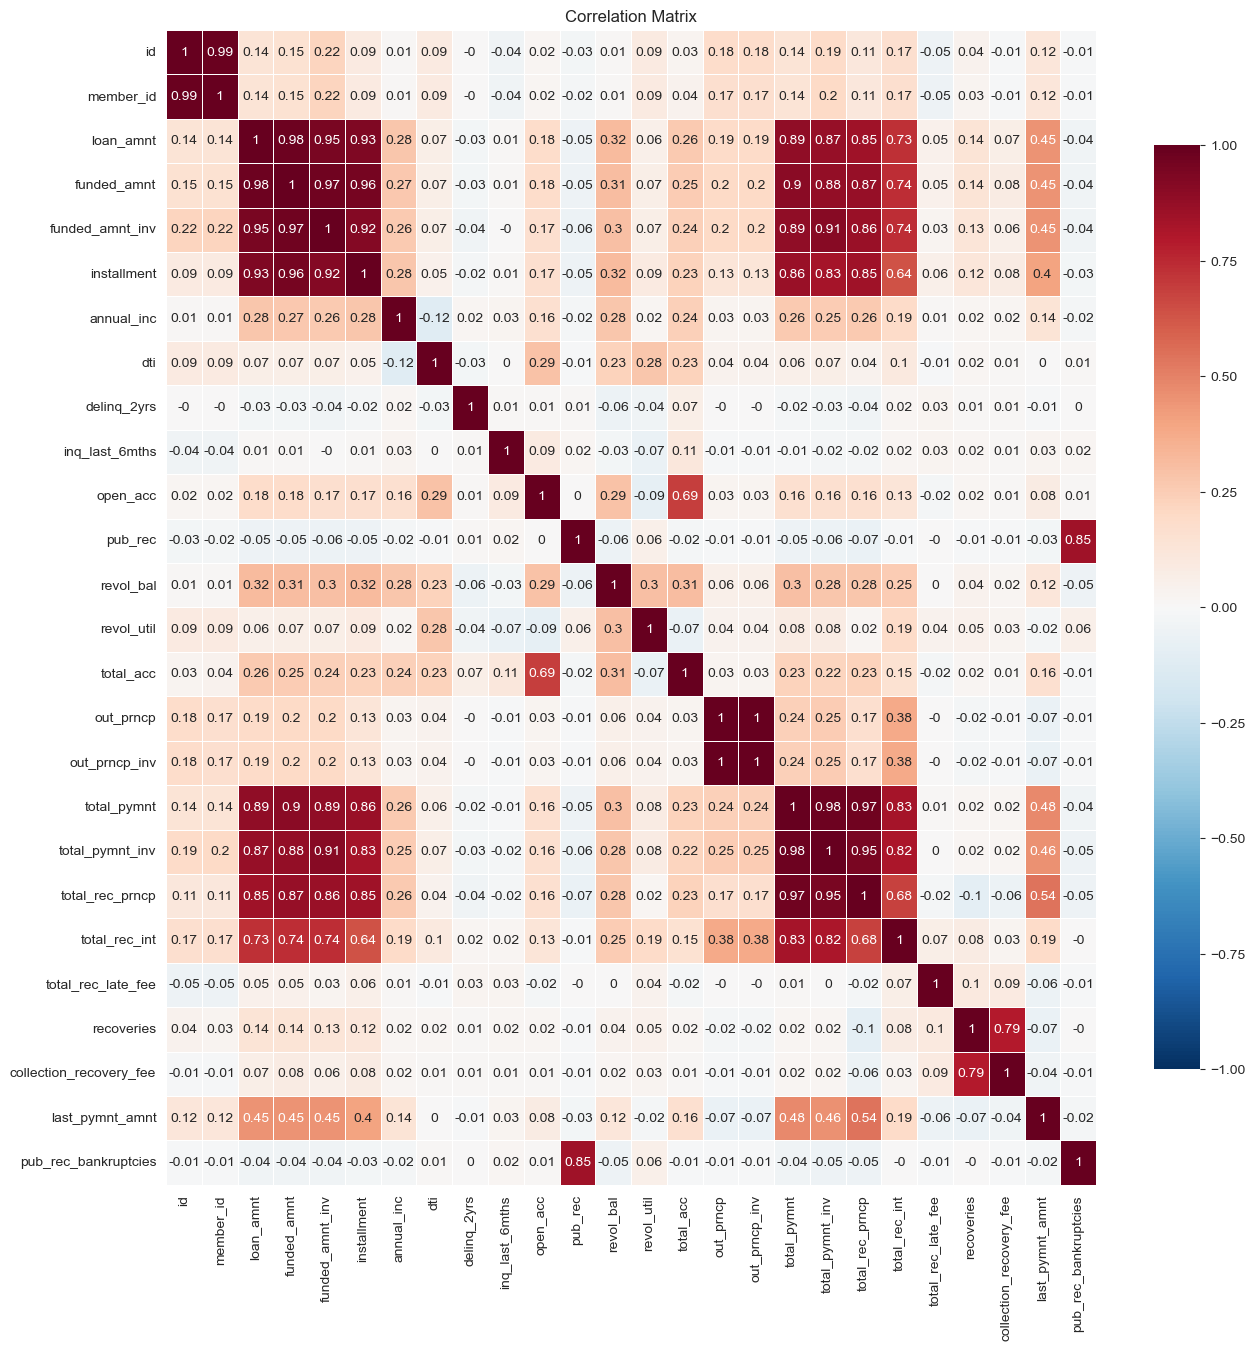

In [302]:
plt.figure(figsize=(15, 15))
graph = sns.heatmap(loan_data2.corr().round(2), cmap='RdBu_r', linewidths=.5, cbar_kws={"shrink": 0.8}, annot=True,
                   vmax=1, vmin=-1, center=0)
plt.title('Correlation Matrix')
plt.show()

In [253]:
loan_data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39020 entries, 0 to 39680
Data columns (total 47 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   id                       39020 non-null  int64         
 1   member_id                39020 non-null  int64         
 2   loan_amnt                39020 non-null  int64         
 3   funded_amnt              39020 non-null  int64         
 4   funded_amnt_inv          39020 non-null  float64       
 5   term                     39020 non-null  object        
 6   int_rate                 39020 non-null  object        
 7   installment              39020 non-null  float64       
 8   grade                    39020 non-null  object        
 9   sub_grade                39020 non-null  object        
 10  emp_title                39020 non-null  object        
 11  emp_length               39020 non-null  object        
 12  home_ownership           39020 n

In [257]:
loan_data2[['loan_amnt','funded_amnt','funded_amnt_inv']].describe()

,loan_amnt,funded_amnt,funded_amnt_inv
count,39020.000000,39020.000000,39020.000000
mean,11242.004741,10967.680677,10541.094952
std,7472.992773,7200.731107,7104.340838
min,500.000000,500.000000,0.000000
25%,5500.000000,5400.000000,5000.000000
50%,10000.000000,9650.000000,9000.000000
75%,15000.000000,15000.000000,14475.000000
max,35000.000000,35000.000000,35000.000000


In [259]:
loan_data2[['loan_amnt','funded_amnt','funded_amnt_inv']].describe(percentiles=[.1, .2, .25, .3, .4, .5, .6 , .7, .75, .8, .9, 1])

,loan_amnt,funded_amnt,funded_amnt_inv
count,39020.000000,39020.000000,39020.000000
mean,11242.004741,10967.680677,10541.094952
std,7472.992773,7200.731107,7104.340838
min,500.000000,500.000000,0.000000
10%,3200.000000,3200.000000,3000.000000
20%,5000.000000,5000.000000,4739.649370
25%,5500.000000,5400.000000,5000.000000
30%,6000.000000,6000.000000,5975.000000
40%,8000.000000,7800.000000,7200.000000
50%,10000.000000,9650.000000,9000.000000


In [323]:
loan_data2[['funded_amnt_inv']].describe(percentiles=[.1, .2, .3, .4, .5, .6 , .7, .8, .9, 1]).iloc[[4,5,6,7,8,9,10,11,12,13]]

,funded_amnt_inv
10%,3000.000000
20%,4739.649370
30%,5975.000000
40%,7200.000000
50%,9000.000000
60%,10524.257458
70%,12807.115027
80%,15551.949258
90%,20000.000000
100%,35000.000000


<AxesSubplot:>

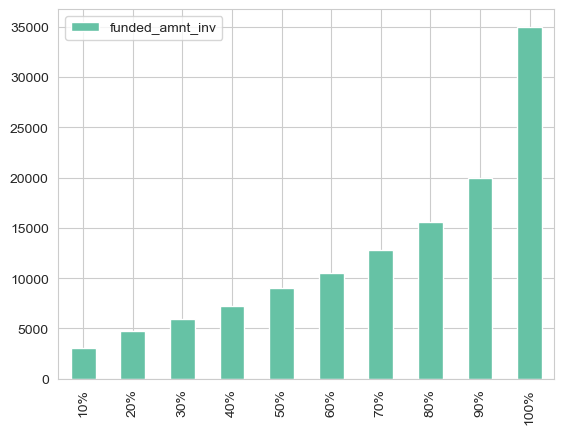

In [324]:
loan_data2[['funded_amnt_inv']].describe(percentiles=[.1, .2, .3, .4, .5, .6 , .7, .8, .9, 1]).iloc[[4,5,6,7,8,9,10,11,12,13]].plot.bar( y='funded_amnt_inv')

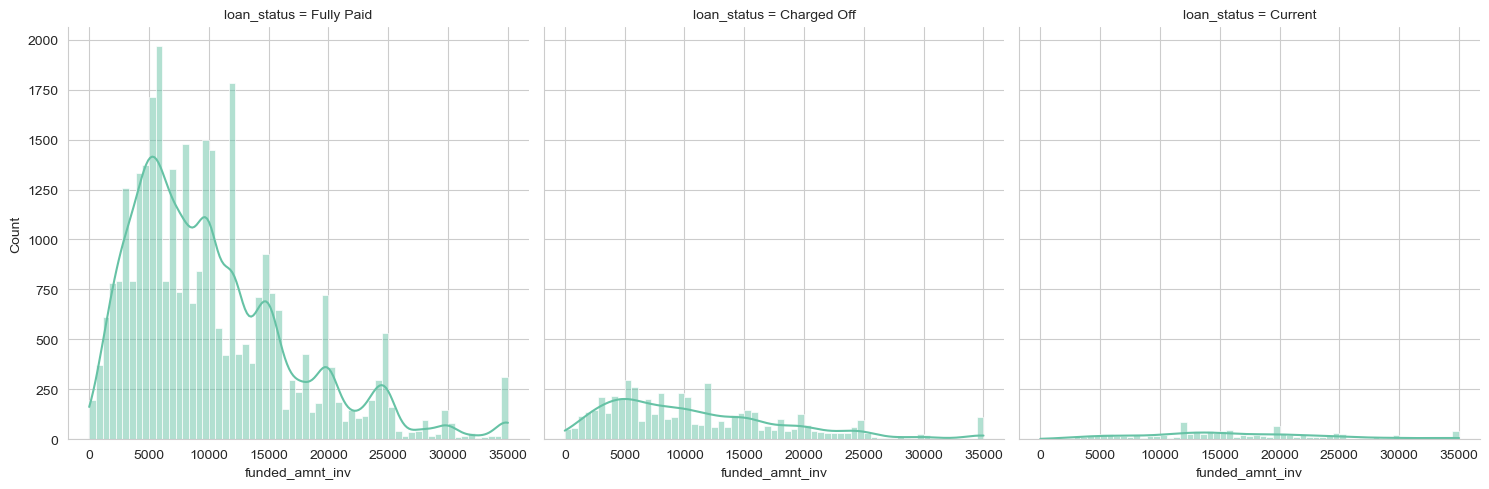

In [307]:
sns.displot(loan_data2, x='funded_amnt_inv', col='loan_status', kde=True)

**Few Observations**

<br/>
1. Here we found that the 'loan' which are fully paid have more probability to get the loan approved. <br/>
2. For the cases, where we can see few borrower's taking lesser loan amount, how ever,  are likely to get the loan approved.<br/>
3. for 'Current' loans, it may take some time to track the details, however, as per data, it seems there are less loans approved in the current year (all issue dates are from year 2023).

<AxesSubplot:xlabel='loan_status', ylabel='funded_amnt_inv'>

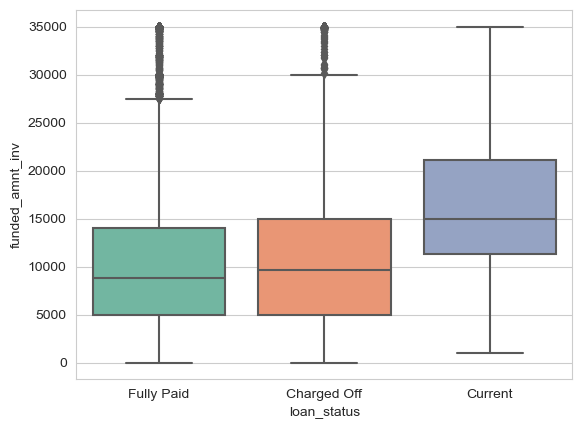

In [312]:
sns.boxplot(data=loan_data2, x='loan_status', y='funded_amnt_inv', 
           )